# Vorverarbeitung (Bereinigung) der Wetterdaten

**Libraries**<br>
pandas:         Datenverarbeitung<br>
os:             Betriebsystem-Funktionen für relative Pfadreferenzierung<br>
seaborn:        Datenvisualisierung (Histogramme)<br>
matplotlib:     Plotting<br>         

In [34]:
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

dirname = os.path.abspath('')
df_path = os.path.join(dirname, '2019_Merged_Data_15min.csv')

**Ausreißer-Detektierung und Entfernen der betroffenen Messreihe**

In [35]:
# Read the DataFrame from CSV
df = pd.read_csv(df_path)
df_with_outliers = df

# Get column names
column_names = df.columns.tolist()

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Print the list of column names
print("Column names:", column_names)
print("Shape (rows, columns):", df.shape)

# Calculate Z-scores for each data point in each numeric column
z_scores_numeric = stats.zscore(df[numeric_columns])

# Create a DataFrame with Z-scores, keeping non-numeric columns intact
z_scores_df = pd.DataFrame(index=df.index, columns=df.columns)
z_scores_df[numeric_columns] = z_scores_numeric

# Define a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3

# Identify and remove outliers based on the threshold
outliers_mask = abs(z_scores_df[numeric_columns]) > threshold
df_no_outliers = df.copy()
df_no_outliers[numeric_columns] = df_no_outliers[numeric_columns].mask(outliers_mask)

# Count outliers per numeric column
outliers_count_per_column = outliers_mask.sum(axis=0)

# Remove rows with NaN values
df_no_outliers = df_no_outliers.dropna()

print("Number of outliers per column:")
print(outliers_count_per_column)

# Print the list of column names
print("Shape (rows, columns):", df_no_outliers.shape)
print("Datarow loss when dropping outliers:", (1-df_no_outliers.shape[0]/df_with_outliers.shape[0])*100)

df_no_outliers.to_csv('2019_Cleaned_Data_15min.csv', index=False) #index=FALSE for not including row indices

Column names: ['MESS_DATUM', 'RWS_DAU_10', 'RWS_10', 'DS_10', 'GS_10', 'SD_10', 'FF_10', 'DD_10', 'PP_10', 'TT_10', 'TM5_10', 'RF_10']
Shape (rows, columns): (52560, 12)
Number of outliers per column:
RWS_DAU_10    3728
RWS_10          30
DS_10          149
GS_10          149
SD_10            0
FF_10            3
DD_10            3
PP_10           95
TT_10          117
TM5_10         198
RF_10           44
dtype: int64
Shape (rows, columns): (48334, 12)
Datarow loss when dropping outliers: 8.040334855403353


**Plotten der Messwert-Verteilung**<br>
Die Messreihen werden auf subplots verteilt. Der subplot-Parameter "subplot(xyz)" spezifiziert die Anzahl der Reihen (x=4), die Anzahl der Spalten (y=2) und die Nummer des gewählten subplots (z={1-8}).

Text(0, 0.5, 'Density')

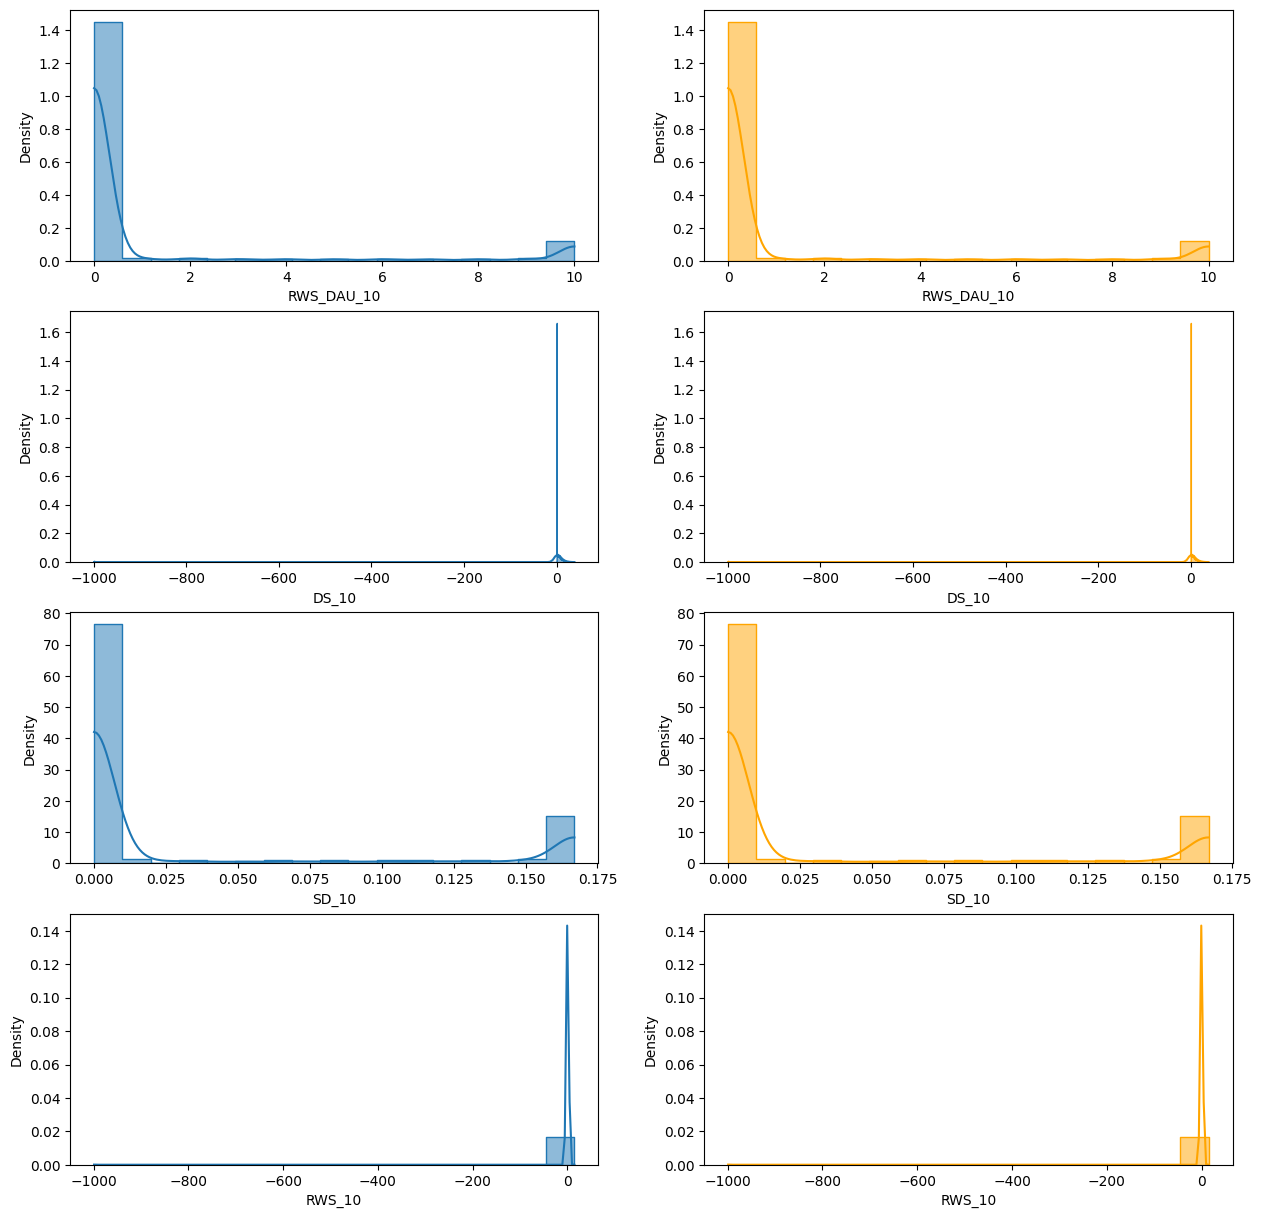

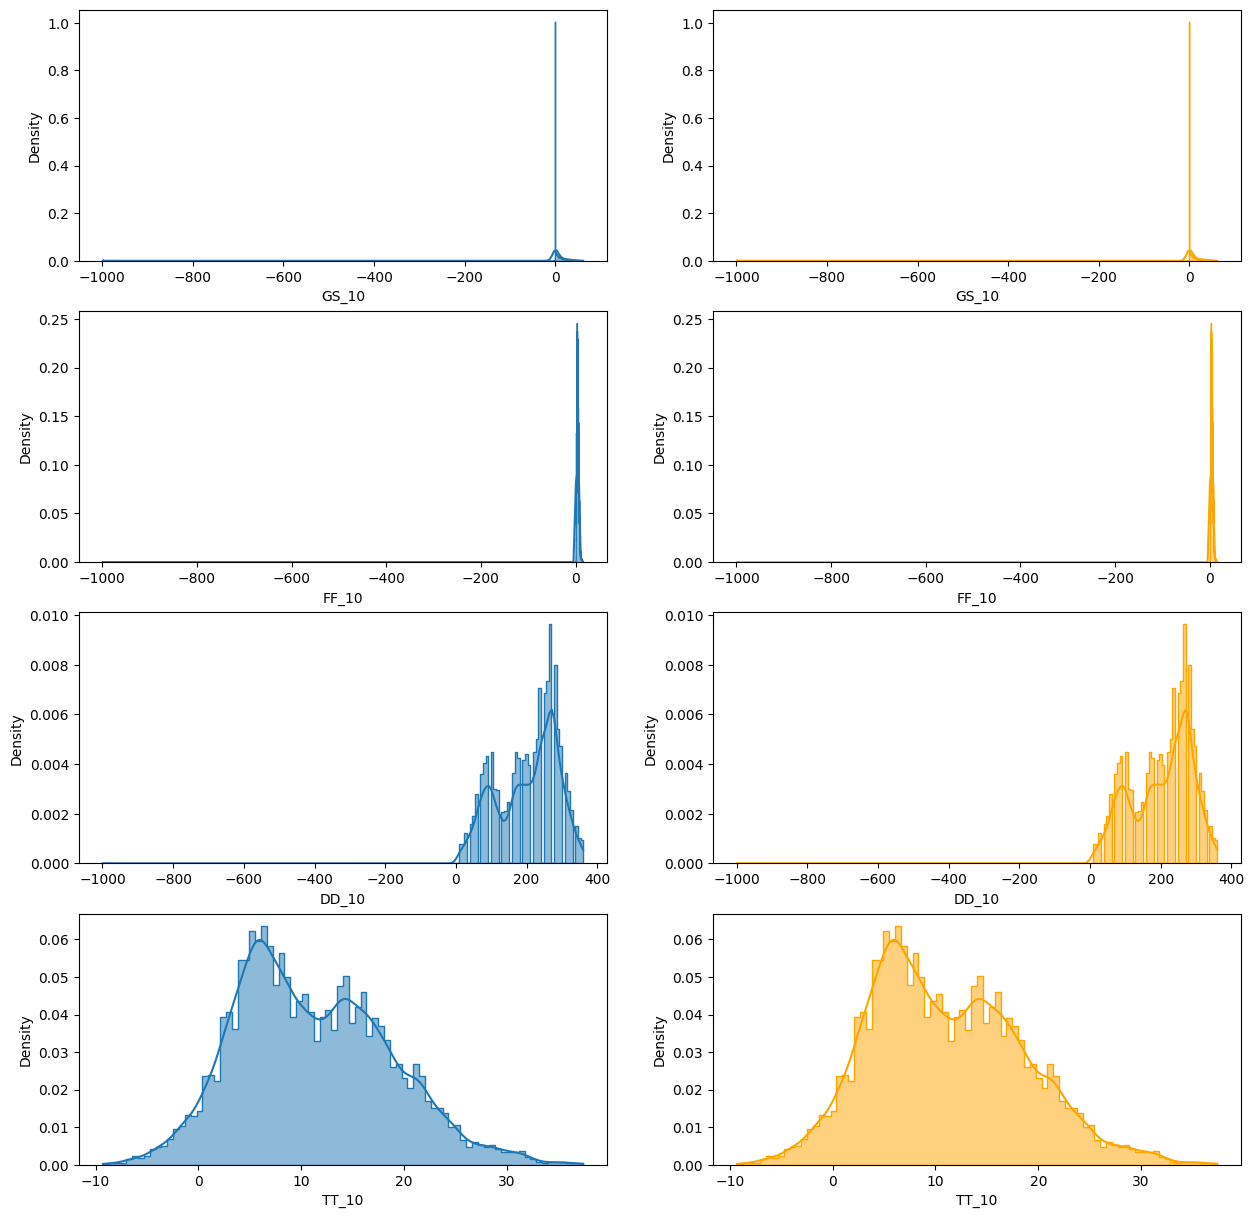

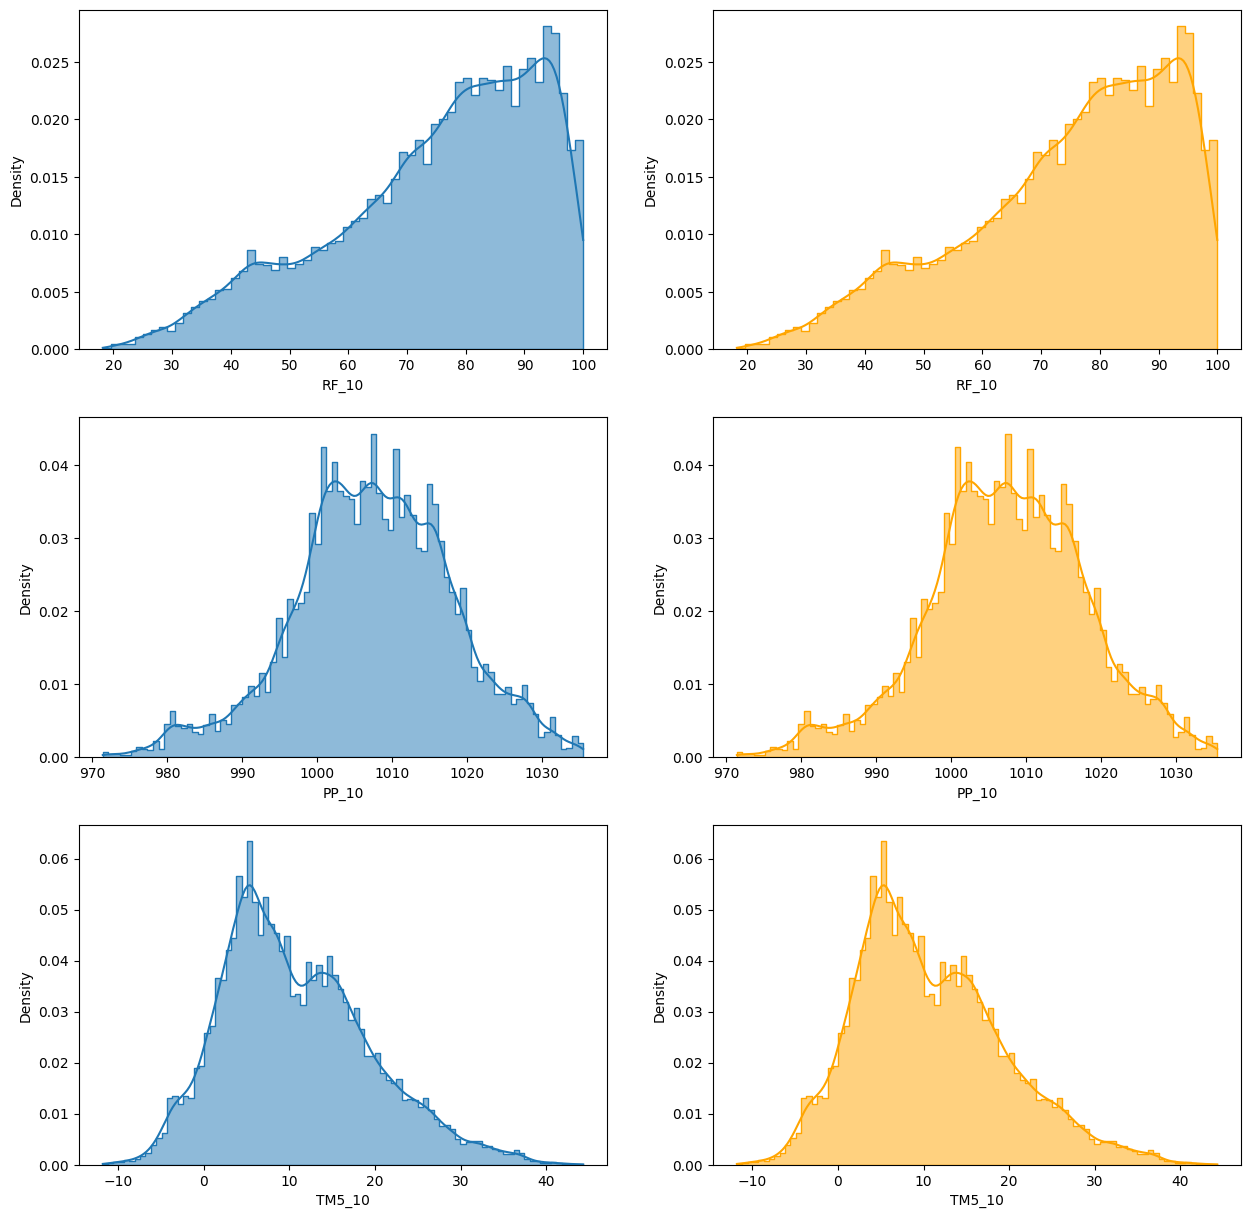

In [36]:
height, width = 15, 15

plt.figure(figsize=(width, height))

plt.subplot(421)
sns.histplot(df['RWS_DAU_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(422)
sns.histplot(df_with_outliers['RWS_DAU_10'], kde=True, element="step", stat="density", color = "orange")
plt.ylabel('Density')

plt.subplot(423)
sns.histplot(df['DS_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(424)
sns.histplot(df_with_outliers['DS_10'], kde=True, element="step", stat="density", color = "orange")
plt.ylabel('Density')

plt.subplot(425)
sns.histplot(df['SD_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(426)
sns.histplot(df_with_outliers['SD_10'], kde=True, element="step", stat="density", color = "orange")
plt.ylabel('Density')

plt.subplot(427)
sns.histplot(df['RWS_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(428)
sns.histplot(df_with_outliers['RWS_10'], kde=True, element="step", stat="density", color="orange")
plt.ylabel('Density')

###################################################

plt.figure(figsize=(width, height))

plt.subplot(421)
sns.histplot(df['GS_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(422)
sns.histplot(df_with_outliers['GS_10'], kde=True, element="step", stat="density", color="orange")
plt.ylabel('Density')

plt.subplot(423)
sns.histplot(df['FF_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(424)
sns.histplot(df_with_outliers['FF_10'], kde=True, element="step", stat="density", color="orange")
plt.ylabel('Density')

plt.subplot(425)
sns.histplot(df['DD_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(426)
sns.histplot(df_with_outliers['DD_10'], kde=True, element="step", stat="density", color="orange")
plt.ylabel('Density')

plt.subplot(427)
sns.histplot(df['TT_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(428)
sns.histplot(df_with_outliers['TT_10'], kde=True, element="step", stat="density", color="orange")
plt.ylabel('Density')

###################################################

plt.figure(figsize=(width, height))

plt.subplot(321)
sns.histplot(df['RF_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(322)
sns.histplot(df_with_outliers['RF_10'], kde=True, element="step", stat="density", color="orange")
plt.ylabel('Density')

plt.subplot(323)
sns.histplot(df['PP_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(324)
sns.histplot(df_with_outliers['PP_10'], kde=True, element="step", stat="density", color="orange")
plt.ylabel('Density')

plt.subplot(325)
sns.histplot(df['TM5_10'], kde=True, element="step", stat="density")
plt.ylabel('Density')

plt.subplot(326)
sns.histplot(df_with_outliers['TM5_10'], kde=True, element="step", stat="density", color="orange")
plt.ylabel('Density')